Text(0.5,1,'S&P500 Weekly Closing Index')

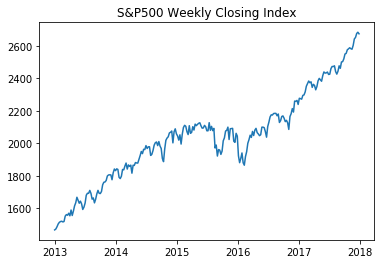

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings('ignore')
%load_ext rpy2.ipython
%matplotlib inline

df = pd.read_csv('D:/data/sp500-weekly.csv', index_col = 'Date')
df.index = pd.to_datetime(df.index)
df = df.drop('Adj Close', 1)
ts = df['Close']
plt.plot(ts)
plt.title('S&P500 Weekly Closing Index')

Text(0.5,1,'Log Transformation')

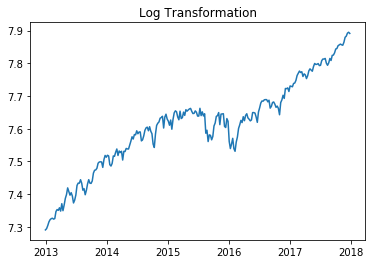

In [2]:
ts_log = np.log(ts)
plt.plot(ts_log)
plt.title("Log Transformation")

Text(0.5,1,'Log Differencing')

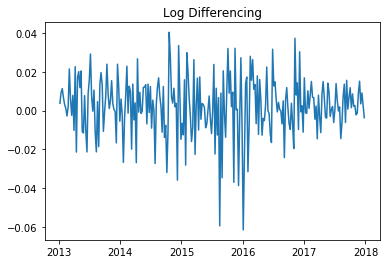

In [3]:
ts_log_diff = ts_log.diff(1)
ts_log_diff.dropna(inplace = True)
plt.plot(ts_log_diff)
plt.title("Log Differencing")

In [4]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import statsmodels


def draw_trend(timeSeries, size):
    f = plt.figure(facecolor='white')
    rol_mean = timeSeries.rolling(window=size).mean()
    rol_weighted_mean = timeSeries.ewm(span=12,min_periods=0,
                                   adjust=True,ignore_na=False).mean()
    rol_std = timeSeries.rolling(window = size).std()


    timeSeries.plot(color='blue', label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    rol_std.plot(color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()

def draw_ts(timeSeries):
    f = plt.figure(facecolor='white')
    timeSeries.plot(color='blue')
    plt.show()

'''
　　Unit Root Test
   The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
   root, with the alternative that there is no unit root. That is to say the
   bigger the p-value the more reason we assert that there is a unit root
'''
def testStationarity(ts):
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                             'p-value','#Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

def draw_acf_pacf(ts, lags=31):
    plot_acf(ts, lags=lags)
    plot_pacf(ts, lags=lags)
    plt.show()

In [5]:
testStationarity(ts_log_diff)

Test Statistic                -7.856133e+00
p-value                        5.436661e-12
#Lags Used                     6.000000e+00
Number of Observations Used    2.530000e+02
Critical Value (1%)           -3.456464e+00
Critical Value (5%)           -2.873033e+00
Critical Value (10%)          -2.572895e+00
dtype: float64

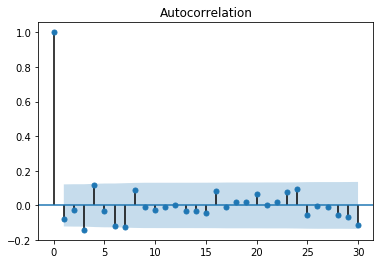

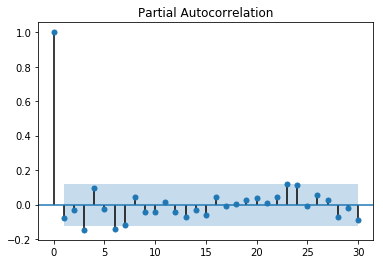

In [7]:
plot_acf(ts_log_diff, lags = 30)
plt.show()
plot_pacf(ts_log_diff, lags = 30)
plt.show()

**Linear section: ARMA Modeling**

Text(0.5,1,'RSS: 0.0569')

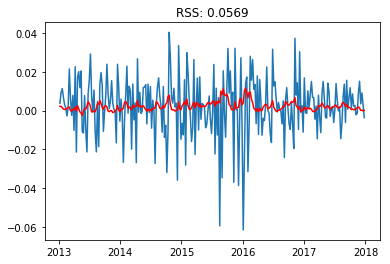

In [8]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(ts_log_diff, order = (1,1))
result_arma = model.fit(disp = -1)
plt.plot(ts_log_diff)
plt.plot(result_arma.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((result_arma.fittedvalues-ts_log_diff)**2))

In [9]:
print("AIC:", result_arma.aic)
print(result_arma.params)

AIC: -1445.360878227702
const          0.002251
ar.L1.Close    0.760026
ma.L1.Close   -0.862050
dtype: float64


**Volatility section: Residual analysis and arch/garch modeling**

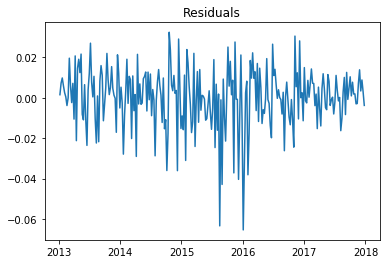

(array([  3.27910934e-04,   2.94357423e-01,   2.32382189e+00,
          7.52030706e+00,   7.54685687e+00,   1.02443500e+01,
          1.32028542e+01,   1.52983635e+01,   1.53028089e+01,
          1.54355923e+01,   1.54418400e+01,   1.54584127e+01,
          1.56117179e+01,   1.57613846e+01,   1.60539022e+01,
          1.82153047e+01,   1.82364309e+01,   1.86073237e+01,
          1.91120869e+01,   2.10825077e+01,   2.13117538e+01,
          2.18833532e+01,   2.44197409e+01,   2.76994799e+01,
          2.81085677e+01,   2.81253295e+01,   2.81267287e+01,
          2.88945298e+01,   3.01033204e+01,   3.33772532e+01,
          3.64403533e+01,   3.64588319e+01,   3.73194059e+01,
          3.75160650e+01,   3.76952956e+01,   3.81723329e+01,
          3.83965317e+01,   3.91760233e+01,   3.93230312e+01,
          3.99848793e+01]),
 array([ 0.98555245,  0.86313971,  0.50797263,  0.11081716,  0.18304104,
         0.11473193,  0.06731745,  0.0535971 ,  0.08294714,  0.11696949,
         0.1631494 ,

In [10]:
plt.plot(result_arma.resid)
test = result_arma.resid
plt.title("Residuals")
plt.show()
from statsmodels.stats.diagnostic import acorr_ljungbox as ljungbox
ljungbox(result_arma.resid)

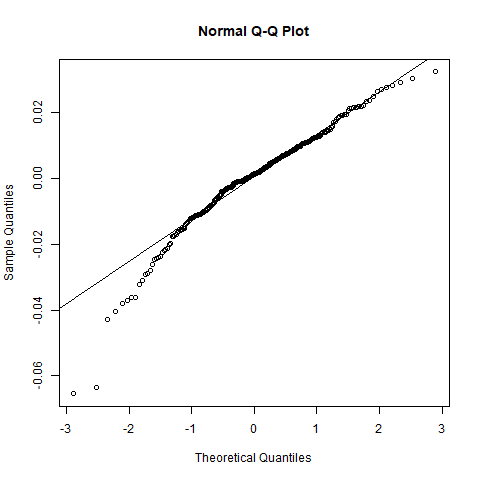

In [11]:
%%R -i test
qqnorm(test)
qqline(test)

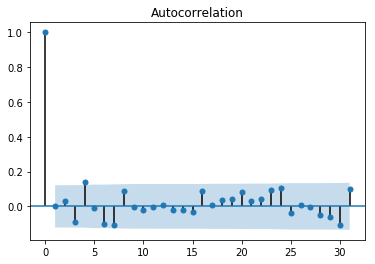

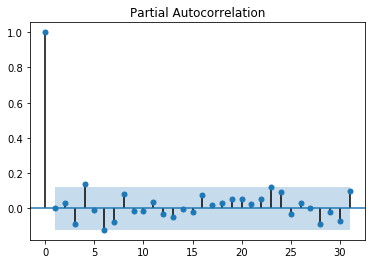

In [14]:
draw_acf_pacf(result_arma.resid)

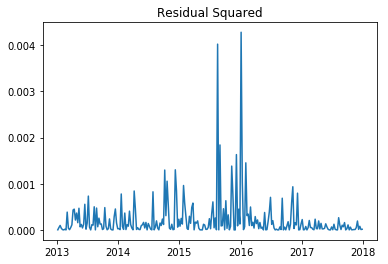

(array([  0.74603866,   5.18063639,   5.18595102,  24.34066182,
         25.33048539,  25.52265351,  29.71095874,  35.81025407,
         36.01528298,  36.0301249 ,  36.03382155,  38.81375131,
         39.08758874,  39.10795627,  39.62679299,  43.34869141,
         43.52362541,  46.69497006,  46.69562869,  69.3797775 ,
         69.99605451,  70.00878073,  70.06440974,  77.84153539,
         77.88890944,  77.99970343,  78.185235  ,  78.53808708,
         78.56237007,  80.11921195,  80.12297553,  80.56698048,
         81.41339789,  81.92182975,  82.57214041,  82.86919108,
         83.6227601 ,  83.68509084,  83.80549236,  83.81043829]),
 array([  3.87733318e-01,   7.49961729e-02,   1.58676420e-01,
          6.82478744e-05,   1.20281013e-04,   2.73151826e-04,
          1.07278329e-04,   1.90216129e-05,   3.93997848e-05,
          8.31785540e-05,   1.67058181e-04,   1.12932731e-04,
          1.93607270e-04,   3.50982524e-04,   5.16186684e-04,
          2.47578392e-04,   4.02467130e-04,   2.

In [15]:
residual = result_arma.resid
residual_2 = residual*residual
plt.plot(residual_2)
plt.title("Residual Squared")
plt.show()
ljungbox(residual_2)

**We are confident to detect Arch/Garch effect**

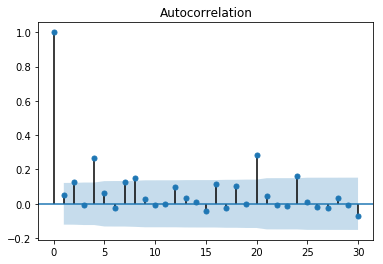

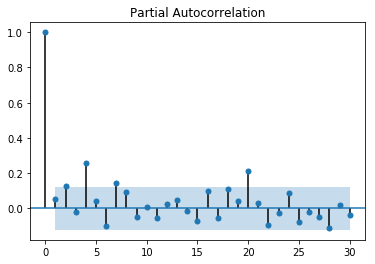

In [16]:
draw_acf_pacf(residual_2, lags = 30)
plt.show()

**We first choose Arch(4) as our model, but the forth param is not significant**

In [19]:
%%R -i residual -o m1
library(fGarch)
m1 = garchFit(~garch(4,0), data = residual, trace = F)

In [20]:
print(m1)



Title:

 GARCH Modelling 



Call:

 garchFit(formula = ~garch(4, 0), data = residual, trace = F) 



Mean and Variance Equation:

 data ~ garch(4, 0)

<environment: 0x000001829d102610>

 [data = residual]



Conditional Distribution:

 norm 



Coefficient(s):

        mu       omega      alpha1      alpha2      alpha3      alpha4  

0.00057654  0.00011801  0.06643506  0.05809806  0.00401168  0.32197314  



Std. Errors:

 based on Hessian 



Error Analysis:

        Estimate  Std. Error  t value Pr(>|t|)    

mu     5.765e-04   7.823e-04    0.737   0.4612    

omega  1.180e-04   2.137e-05    5.522 3.35e-08 ***

alpha1 6.644e-02   5.320e-02    1.249   0.2117    

alpha2 5.810e-02   4.739e-02    1.226   0.2202    

alpha3 4.012e-03   4.289e-02    0.094   0.9255    

alpha4 3.220e-01   1.069e-01    3.011   0.0026 ** 

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Log Likelihood:

 743.112    normalized:  2.858123 



Description:

 Thu May 10 00:59:51 2018 by

**Then we choose arch(3), not significant**

In [30]:
%%R -i residual -o m1
library(fGarch)
m1 = garchFit(~garch(3,0), data = residual, trace = F)

In [31]:
print(m1)



Title:

 GARCH Modelling 



Call:

 garchFit(formula = ~garch(3, 0), data = residual, trace = F) 



Mean and Variance Equation:

 data ~ garch(3, 0)

<environment: 0x000001829dcf0a10>

 [data = residual]



Conditional Distribution:

 norm 



Coefficient(s):

        mu       omega      alpha1      alpha2      alpha3  

0.00024482  0.00016283  0.04856295  0.16564523  0.05502268  



Std. Errors:

 based on Hessian 



Error Analysis:

        Estimate  Std. Error  t value Pr(>|t|)    

mu     2.448e-04   8.916e-04    0.275    0.784    

omega  1.628e-04   3.014e-05    5.402  6.6e-08 ***

alpha1 4.856e-02   4.995e-02    0.972    0.331    

alpha2 1.656e-01   1.053e-01    1.573    0.116    

alpha3 5.502e-02   7.616e-02    0.722    0.470    

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Log Likelihood:

 730.2786    normalized:  2.808764 



Description:

 Thu May 10 01:11:52 2018 by user: charl 





**Arch(2), still not so good...**

In [32]:
%%R -i residual -o m1
library(fGarch)
m1 = garchFit(~garch(2,0), data = residual, trace = F)

In [33]:
print(m1)



Title:

 GARCH Modelling 



Call:

 garchFit(formula = ~garch(2, 0), data = residual, trace = F) 



Mean and Variance Equation:

 data ~ garch(2, 0)

<environment: 0x000001829ee1f548>

 [data = residual]



Conditional Distribution:

 norm 



Coefficient(s):

        mu       omega      alpha1      alpha2  

0.00012692  0.00017906  0.04444161  0.13767627  



Std. Errors:

 based on Hessian 



Error Analysis:

        Estimate  Std. Error  t value Pr(>|t|)    

mu     1.269e-04   8.919e-04    0.142    0.887    

omega  1.791e-04   2.294e-05    7.805    6e-15 ***

alpha1 4.444e-02   4.804e-02    0.925    0.355    

alpha2 1.377e-01   8.941e-02    1.540    0.124    

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Log Likelihood:

 730.0151    normalized:  2.80775 



Description:

 Thu May 10 01:13:16 2018 by user: charl 





**Final touch, Arch(1). Nope, we can not use arch model at all...**

In [42]:
%%R -i residual -o m1
library(fGarch)
m1 = garchFit(~garch(1,0), data = residual, trace = F)

In [41]:
print(m1)



Title:

 GARCH Modelling 



Call:

 garchFit(formula = ~garch(1, 0), data = residual, trace = F, 

    dist = "std") 



Mean and Variance Equation:

 data ~ garch(1, 0)

<environment: 0x000001829d8fcd50>

 [data = residual]



Conditional Distribution:

 norm 



Coefficient(s):

        mu       omega      alpha1  

0.00010888  0.00021080  0.03470921  



Std. Errors:

 based on Hessian 



Error Analysis:

        Estimate  Std. Error  t value Pr(>|t|)    

mu     1.089e-04   9.133e-04    0.119    0.905    

omega  2.108e-04   2.059e-05   10.236   <2e-16 ***

alpha1 3.471e-02   4.658e-02    0.745    0.456    

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Log Likelihood:

 727.1342    normalized:  2.79667 



Description:

 Thu May 10 01:25:33 2018 by user: charl 





**Then we choose garch model, and after several attempts, only the params of garch(1,1) are all significant. Therefore, we choose garch(1,1)** ***with distribution of normal***

In [99]:
%%R -i residual -o m1,resid1
library(fGarch)
m1 = garchFit(~garch(1,1), data = residual, trace = F)
resid1 = residuals(m1, standardize = T)

In [101]:
print(m1)#Garch(1,1) report



Title:

 GARCH Modelling 



Call:

 garchFit(formula = ~garch(1, 1), data = residual, trace = F) 



Mean and Variance Equation:

 data ~ garch(1, 1)

<environment: 0x000001829e0e5ae8>

 [data = residual]



Conditional Distribution:

 norm 



Coefficient(s):

        mu       omega      alpha1       beta1  

5.7654e-04  1.2839e-06  7.8522e-02  9.1811e-01  



Std. Errors:

 based on Hessian 



Error Analysis:

        Estimate  Std. Error  t value Pr(>|t|)    

mu     5.765e-04   7.958e-04    0.725  0.46875    

omega  1.284e-06   3.858e-06    0.333  0.73932    

alpha1 7.852e-02   3.030e-02    2.591  0.00957 ** 

beta1  9.181e-01   3.574e-02   25.689  < 2e-16 ***

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Log Likelihood:

 739.5719    normalized:  2.844507 



Description:

 Thu May 10 08:35:25 2018 by user: charl 





**Residual test of garch(1,1)**

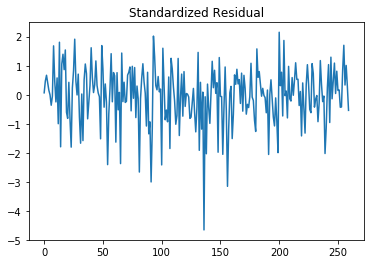

(array([  0.05682919,   0.635756  ,   2.81565874,   4.24505422,
          4.81424173,   6.36347608,   7.02719225,   8.82291336,
          9.078504  ,   9.08810658,   9.67911964,   9.78081751,
          9.82531698,   9.97318364,  11.51182214,  12.79877271,
         12.79895817,  12.82874264,  12.84223945,  14.24548072,
         14.31444612,  14.50671442,  15.74036442,  19.62991176,
         20.63619423,  21.3404553 ,  21.44700557,  21.76710114,
         23.22579559,  24.95118268,  27.99919601,  28.05512347,
         29.07176476,  29.4749505 ,  29.49416903,  29.81554859,
         29.93986922,  30.17487004,  30.4261981 ,  30.97510045]),
 array([ 0.8115796 ,  0.72769156,  0.42092869,  0.37385604,  0.4389686 ,
         0.3837281 ,  0.42605412,  0.35745445,  0.43005939,  0.52376289,
         0.55946052,  0.63518256,  0.70815262,  0.7641414 ,  0.71554074,
         0.68741002,  0.74953705,  0.80164483,  0.84654832,  0.81783452,
         0.85571727,  0.88252416,  0.86615597,  0.71761572,  0.712

In [102]:
resid1 = np.array(resid1)
plt.plot(resid1)
plt.title('Standardized Residual')
plt.show()
ljungbox(resid1)

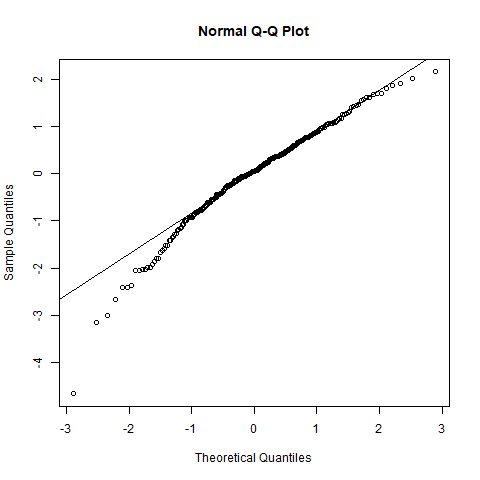

In [103]:
%%R -i resid1
qqnorm(resid1)
qqline(resid1)

**From the QQ plot above, it seems we should suppose the conditional distribution is standard t-distribution instead.**

In [119]:
%%R -i residual -o m1,resid1
library(fGarch)
m1 = garchFit(~garch(1,1), data = residual, trace = F, cond.dist = "std")
resid1 = residuals(m1, standardize = T)
(summary(m1))

In [120]:
print(m1)



Title:

 GARCH Modelling 



Call:

 garchFit(formula = ~garch(1, 1), data = residual, cond.dist = "std", 

    trace = F) 



Mean and Variance Equation:

 data ~ garch(1, 1)

<environment: 0x000001829db504c8>

 [data = residual]



Conditional Distribution:

 std 



Coefficient(s):

        mu       omega      alpha1       beta1       shape  

5.7654e-04  3.8356e-06  8.4697e-02  9.0091e-01  6.3510e+00  



Std. Errors:

 based on Hessian 



Error Analysis:

        Estimate  Std. Error  t value Pr(>|t|)    

mu     5.765e-04   7.881e-04    0.732   0.4645    

omega  3.836e-06   6.564e-06    0.584   0.5590    

alpha1 8.470e-02   4.422e-02    1.915   0.0554 .  

beta1  9.009e-01   5.733e-02   15.715   <2e-16 ***

shape  6.351e+00   2.603e+00    2.440   0.0147 *  

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Log Likelihood:

 745.3413    normalized:  2.866697 



Description:

 Thu May 10 15:40:58 2018 by user: charl 





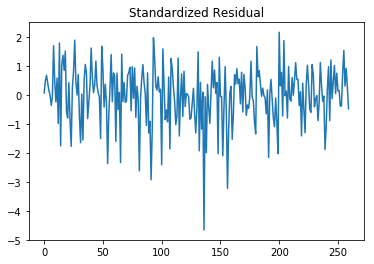

(array([  0.08451817,   0.63954398,   2.81242114,   4.48022657,
          4.96360506,   6.54058787,   7.22868763,   9.09567815,
          9.25800429,   9.26050675,   9.82949444,   9.88689199,
          9.9006738 ,  10.05574563,  11.61476373,  13.05549464,
         13.05567718,  13.09788078,  13.10126163,  14.45397353,
         14.51666008,  14.70848396,  16.01888175,  20.1411624 ,
         21.19949288,  21.79922602,  21.90978357,  22.22030665,
         23.71830796,  25.47972892,  28.49859498,  28.57502753,
         29.56733617,  29.91624481,  29.94634068,  30.29039614,
         30.42145183,  30.67769576,  30.84450286,  31.44564359]),
 array([ 0.7712654 ,  0.72631463,  0.42145926,  0.34489854,  0.42033803,
         0.36542718,  0.40546386,  0.33428911,  0.4138072 ,  0.507572  ,
         0.54578646,  0.62588297,  0.70203576,  0.75809657,  0.70792315,
         0.66869593,  0.73245087,  0.78572565,  0.83334707,  0.80675309,
         0.84640095,  0.87444173,  0.85445923,  0.68872083,  0.681

In [121]:
resid1 = np.array(resid1)
plt.plot(resid1)
plt.title('Standardized Residual')
plt.show()
ljungbox(resid1)

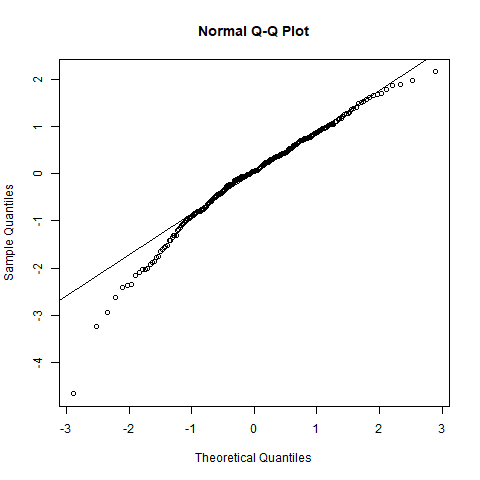

In [122]:
%%R -i resid1
qqnorm(resid1)
qqline(resid1)

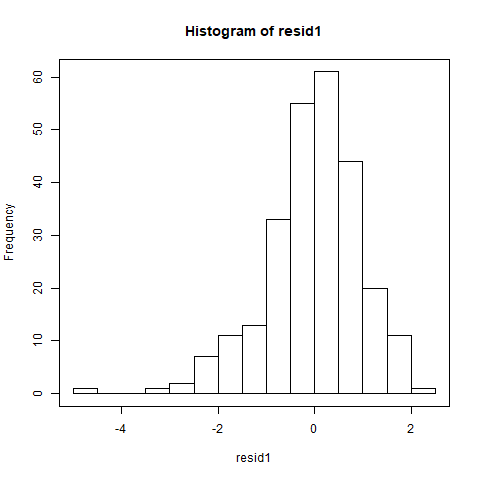

In [123]:
%%R -i resid1
hist(resid1)
box()

**From the QQ-plot above, we believe that the residuals do come from a t-distribution, so we then test the squared residuals.**

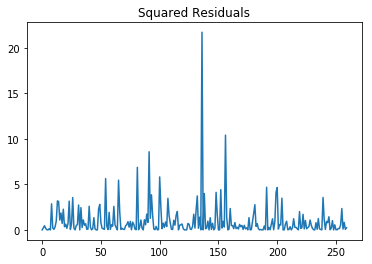

(array([  0.35977075,   1.1087345 ,   2.22382491,   5.43714767,
          5.45974686,   7.07093878,   7.46987381,   7.57396395,
          7.59580549,   7.62322166,   8.28010168,   8.78535909,
          9.19835873,  10.31172913,  11.87987835,  14.21696679,
         14.52445209,  14.52729261,  14.68189163,  25.56491889,
         25.59480017,  26.19029666,  26.37748122,  28.60149718,
         28.65444499,  28.77867686,  28.87216421,  28.9656611 ,
         29.10909824,  31.34825985,  31.40687893,  31.75070741,
         32.68531332,  33.37473252,  34.28629491,  35.81463158,
         36.60305151,  37.2151872 ,  37.22825215,  37.28039697]),
 array([ 0.54863358,  0.57443562,  0.52727087,  0.24530974,  0.36237998,
         0.31433665,  0.38164695,  0.47615181,  0.57533491,  0.66558626,
         0.6880147 ,  0.72114606,  0.75780277,  0.73905586,  0.68809767,
         0.582554  ,  0.62969274,  0.69412775,  0.74258992,  0.18066672,
         0.22232223,  0.24360139,  0.28337175,  0.23548962,  0.278

In [124]:
resid1_2 = resid1*resid1
plt.plot(resid1_2)
plt.title('Squared Residuals')
plt.show()
ljungbox(resid1_2)

It seems that garch(1,2) perform very well, its residuals do not have further corrolation, so our model for the task is **arma(1,1)+garch(1,2)** with the assumption that the ***conditional distribution of Garch model is standard t-distribution whose degree of freedom is 6.***